In [0]:
import keras
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
base_dir = '/content/drive/My Drive/Colab Notebooks/thissae/dataset'

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set test split
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        base_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        subset='validation')

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/5
50/50 [==============================] - 75s 1s/step - loss: 0.6181 - acc: 0.6778 - val_loss: 0.7660 - val_acc: 0.6031
Epoch 2/5
50/50 [==============================] - 11s 223ms/step - loss: 0.3369 - acc: 0.8762 - val_loss: 0.0460 - val_acc: 0.9077
Epoch 3/5
50/50 [==============================] - 12s 233ms/step - loss: 0.1700 - acc: 0.9392 - val_loss: 0.0098 - val_acc: 0.9231
Epoch 4/5
50/50 [==============================] - 11s 221ms/step - loss: 0.0818 - acc: 0.9713 - val_loss: 0.8615 - val_acc: 0.8585
Epoch 5/5
50/50 [==============================] - 11s 223ms/step - loss: 0.0485 - acc: 0.9860 - val_loss: 0.4401 - val_acc: 0.9231


In [0]:
model.save(base_dir+'pepsi_cocacola.h5')

In [0]:
import pickle


with open(base_dir+'save_pickle.pickle', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

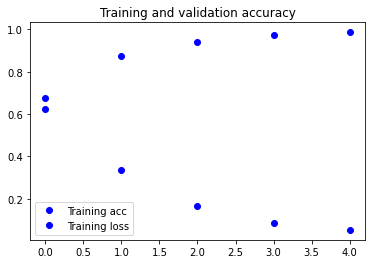

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras.preprocessing import image

IMG_SIZE = 150
loaded_model = keras.models.load_model(base_dir+'pepsi_cocacola.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

image_path= base_dir+"/pepsi/image-10.jpeg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict_classes(img)
plt.title(result[0][0])
plt.show()

In [0]:
image_path= base_dir+"/coca_cola/image-11.jpeg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict_classes(img)
plt.title(result[0][0])
plt.show()

**confusion_matrix**

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

num_of_test_samples = 57
batch_size = 20
Y_pred = loaded_model.predict_generator(validation_generator, validation_generator.samples // validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(train_generator.class_indices.keys()) # ['Good', 'Bad']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [0]:
import seaborn as sns


cm = confusion_matrix(validation_generator.classes, y_pred)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

**Area Curve**

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# make a prediction
y_pred_keras = loaded_model.predict_generator(validation_generator, validation_generator.samples // validation_generator.batch_size+1) #(test_gen, steps=len(df_val), verbose=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(validation_generator.classes, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**MobileNet**

In [0]:
from keras.applications import MobileNet

conv_base = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step


In [0]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

In [0]:
from keras import models
from keras import layers

mobile_model = models.Sequential()
mobile_model.add(conv_base)
mobile_model.add(layers.Flatten())
mobile_model.add(layers.Dense(256, activation='relu'))
mobile_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
mobile_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 7,423,681
Trainable params: 7,401,793
Non-trainable params: 21,888
_________________________________________________________________


In [0]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 12


In [0]:
conv_base.trainable = False


In [0]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(mobile_model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
mobile_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = mobile_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/5
 - 13s - loss: 0.2579 - acc: 0.8670 - val_loss: 0.2167 - val_acc: 0.9338
Epoch 2/5
 - 11s - loss: 0.0732 - acc: 0.9871 - val_loss: 0.1606 - val_acc: 0.9323
Epoch 3/5
 - 12s - loss: 0.0685 - acc: 0.9897 - val_loss: 0.4934 - val_acc: 0.8231
Epoch 4/5
 - 11s - loss: 0.0222 - acc: 0.9977 - val_loss: 0.7108 - val_acc: 0.9246
Epoch 5/5
 - 11s - loss: 0.0123 - acc: 0.9977 - val_loss: 0.0122 - val_acc: 0.9046


In [0]:
mobile_model.save('mobile_pepsi_cocacola.h5')

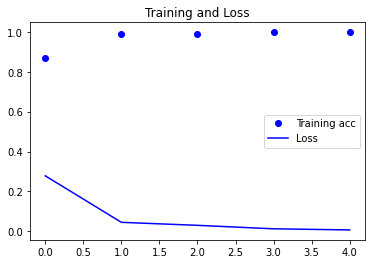

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


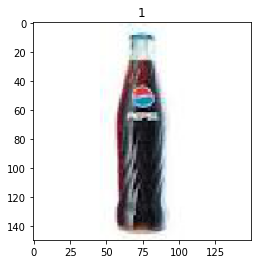

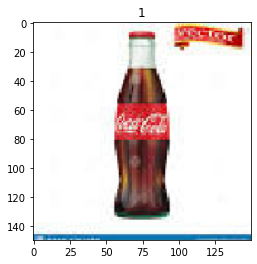

**Xception**

In [0]:
from keras.applications import Xception

Xception_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
Xception_base.summary()
from keras import models
from keras import layers

Xception_model = models.Sequential()
Xception_model.add(Xception_base)
Xception_model.add(layers.Flatten())
Xception_model.add(layers.Dense(256, activation='relu'))
Xception_model.add(layers.Dense(1, activation='sigmoid'))

Xception_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = Xception_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

83689472/83683744 [==============================] - 2s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
__________________________

**VGG16**

In [0]:
from keras.applications import VGG16

VGG16_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
VGG16_base.summary()
from keras import models
from keras import layers

VGG16_model = models.Sequential()
VGG16_model.add(VGG16_base)
VGG16_model.add(layers.Flatten())
VGG16_model.add(layers.Dense(256, activation='relu'))
VGG16_model.add(layers.Dense(1, activation='sigmoid'))

VGG16_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = VGG16_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

**VGG19**

In [0]:
from keras.applications import VGG19

VGG19_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
VGG19_base.summary()
from keras import models
from keras import layers

VGG19_model = models.Sequential()
VGG19_model.add(VGG19_base)
VGG19_model.add(layers.Flatten())
VGG19_model.add(layers.Dense(256, activation='relu'))
VGG19_model.add(layers.Dense(1, activation='sigmoid'))

VGG19_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = VGG19_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

80142336/80134624 [==============================] - 2s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

**ResNet50**

In [0]:
from keras.applications import ResNet50

ResNet50_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
ResNet50_base.summary()
from keras import models
from keras import layers

ResNet50_model = models.Sequential()
ResNet50_model.add(ResNet50_base)
ResNet50_model.add(layers.Flatten())
ResNet50_model.add(layers.Dense(256, activation='relu'))
ResNet50_model.add(layers.Dense(1, activation='sigmoid'))

ResNet50_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = ResNet50_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________

**ResNet101**

In [0]:
from keras.applications import ResNet101

ResNet101_base = ResNet101(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
ResNet101_base.summary()
from keras import models
from keras import layers

ResNet101_model = models.Sequential()
ResNet101_model.add(ResNet101_base)
ResNet101_model.add(layers.Flatten())
ResNet101_model.add(layers.Dense(256, activation='relu'))
ResNet101_model.add(layers.Dense(1, activation='sigmoid'))

ResNet101_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = ResNet101_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

171450368/171446536 [==============================] - 4s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_______________________

**ResNet152**

In [0]:
from keras.applications import ResNet152

ResNet152_base = ResNet152(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
ResNet152_base.summary()
from keras import models
from keras import layers

ResNet152_model = models.Sequential()
ResNet152_model.add(ResNet152_base)
ResNet152_model.add(layers.Flatten())
ResNet152_model.add(layers.Dense(256, activation='relu'))
ResNet152_model.add(layers.Dense(1, activation='sigmoid'))

ResNet152_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = ResNet152_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

234700800/234698864 [==============================] - 6s 0us/step
Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_______________________

**ResNet50V2**

In [0]:
from keras.applications import ResNet50V2

ResNet50V2_base = ResNet50V2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
ResNet50V2_base.summary()
from keras import models
from keras import layers

ResNet50V2_model = models.Sequential()
ResNet50V2_model.add(ResNet50V2_base)
ResNet50V2_model.add(layers.Flatten())
ResNet50V2_model.add(layers.Dense(256, activation='relu'))
ResNet50V2_model.add(layers.Dense(1, activation='sigmoid'))

ResNet50V2_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = ResNet50V2_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

94674944/94668760 [==============================] - 3s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
________________________

**ResNet101V2**

In [0]:
from keras.applications import ResNet101V2

ResNet101V2_base = ResNet101V2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
ResNet101V2_base.summary()
from keras import models
from keras import layers

ResNet101V2_model = models.Sequential()
ResNet101V2_model.add(ResNet101V2_base)
ResNet101V2_model.add(layers.Flatten())
ResNet101V2_model.add(layers.Dense(256, activation='relu'))
ResNet101V2_model.add(layers.Dense(1, activation='sigmoid'))

ResNet101V2_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = ResNet101V2_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

171319296/171317808 [==============================] - 5s 0us/step
Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
_____________________

**ResNet152V2**

In [0]:
from keras.applications import ResNet152V2

ResNet152V2_base = ResNet152V2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
ResNet152V2_base.summary()
from keras import models
from keras import layers

ResNet152V2_model = models.Sequential()
ResNet152V2_model.add(ResNet152V2_base)
ResNet152V2_model.add(layers.Flatten())
ResNet152V2_model.add(layers.Dense(256, activation='relu'))
ResNet152V2_model.add(layers.Dense(1, activation='sigmoid'))

ResNet152V2_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = ResNet152V2_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

234553344/234545216 [==============================] - 6s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
_____________________

**InceptionV3**

In [0]:
from keras.applications import InceptionV3

InceptionV3_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
InceptionV3_base.summary()
from keras import models
from keras import layers

InceptionV3_model = models.Sequential()
InceptionV3_model.add(InceptionV3_base)
InceptionV3_model.add(layers.Flatten())
InceptionV3_model.add(layers.Dense(256, activation='relu'))
InceptionV3_model.add(layers.Dense(1, activation='sigmoid'))

InceptionV3_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = InceptionV3_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

87916544/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 74, 74, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 74, 74, 32)   96          conv2d_9[0][0]                   
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 74, 74, 32)   0           batch_normalization_5[0][0]      
______________________

**InceptionResNetV2**

In [0]:
from keras.applications import InceptionResNetV2

InceptionResNetV2_base = InceptionResNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
InceptionResNetV2_base.summary()
from keras import models
from keras import layers

InceptionResNetV2_model = models.Sequential()
InceptionResNetV2_model.add(InceptionResNetV2_base)
InceptionResNetV2_model.add(layers.Flatten())
InceptionResNetV2_model.add(layers.Dense(256, activation='relu'))
InceptionResNetV2_model.add(layers.Dense(1, activation='sigmoid'))

InceptionResNetV2_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = InceptionResNetV2_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

219062272/219055592 [==============================] - 6s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 74, 74, 32)   864         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_99 (BatchNo (None, 74, 74, 32)   96          conv2d_103[0][0]                 
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 74, 74, 32)   0           batch_normalization_99[0][0]     
_____________

**MobileNet**

In [0]:
from keras.applications import MobileNet

MobileNet_base = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
MobileNet_base.summary()
from keras import models
from keras import layers

MobileNet_model = models.Sequential()
MobileNet_model.add(MobileNet_base)
MobileNet_model.add(layers.Flatten())
MobileNet_model.add(layers.Dense(256, activation='relu'))
MobileNet_model.add(layers.Dense(1, activation='sigmoid'))

MobileNet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = MobileNet_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

**MobileNetV2**

In [0]:
from keras.applications import MobileNetV2

MobileNetV2_base = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
MobileNetV2_base.summary()
from keras import models
from keras import layers

MobileNetV2_model = models.Sequential()
MobileNetV2_model.add(MobileNetV2_base)
MobileNetV2_model.add(layers.Flatten())
MobileNetV2_model.add(layers.Dense(256, activation='relu'))
MobileNetV2_model.add(layers.Dense(1, activation='sigmoid'))

MobileNetV2_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = MobileNetV2_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**DenseNet121**

In [0]:
from keras.applications import DenseNet121

DenseNet121_base = DenseNet121(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
DenseNet121_base.summary()
from keras import models
from keras import layers

DenseNet121_model = models.Sequential()
DenseNet121_model.add(DenseNet121_base)
DenseNet121_model.add(layers.Flatten())
DenseNet121_model.add(layers.Dense(256, activation='relu'))
DenseNet121_model.add(layers.Dense(1, activation='sigmoid'))

DenseNet121_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = DenseNet121_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**DenseNet169**

In [0]:
from keras.applications import DenseNet169

DenseNet169_base = DenseNet169(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
DenseNet169_base.summary()
from keras import models
from keras import layers

DenseNet169_model = models.Sequential()
DenseNet169_model.add(DenseNet169_base)
DenseNet169_model.add(layers.Flatten())
DenseNet169_model.add(layers.Dense(256, activation='relu'))
DenseNet169_model.add(layers.Dense(1, activation='sigmoid'))

DenseNet169_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = DenseNet169_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**DenseNet201**

In [0]:
from keras.applications import DenseNet201

DenseNet201_base = DenseNet201(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
DenseNet201_base.summary()
from keras import models
from keras import layers

DenseNet201_model = models.Sequential()
DenseNet201_model.add(DenseNet201_base)
DenseNet201_model.add(layers.Flatten())
DenseNet201_model.add(layers.Dense(256, activation='relu'))
DenseNet201_model.add(layers.Dense(1, activation='sigmoid'))

DenseNet201_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = DenseNet201_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**NASNetLarge**

In [0]:
from keras.applications import NASNetLarge

NASNetLarge_base = NASNetLarge(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
NASNetLarge_base.summary()
from keras import models
from keras import layers

NASNetLarge_model = models.Sequential()
NASNetLarge_model.add(NASNetLarge_base)
NASNetLarge_model.add(layers.Flatten())
NASNetLarge_model.add(layers.Dense(256, activation='relu'))
NASNetLarge_model.add(layers.Dense(1, activation='sigmoid'))

NASNetLarge_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = NASNetLarge_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**NASNetMobile**

In [0]:
from keras.applications import NASNetMobile

NASNetMobile_base = NASNetMobile(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
NASNetMobile_base.summary()
from keras import models
from keras import layers

NASNetMobile_model = models.Sequential()
NASNetMobile_model.add(NASNetMobile_base)
NASNetMobile_model.add(layers.Flatten())
NASNetMobile_model.add(layers.Dense(256, activation='relu'))
NASNetMobile_model.add(layers.Dense(1, activation='sigmoid'))

NASNetMobile_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = NASNetMobile_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**EfficientNetB0**

In [0]:
from keras.applications import EfficientNetB0

EfficientNetB0_base = EfficientNetB0(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
EfficientNetB0_base.summary()
from keras import models
from keras import layers

EfficientNetB0_model = models.Sequential()
EfficientNetB0_model.add(EfficientNetB0_base)
EfficientNetB0_model.add(layers.Flatten())
EfficientNetB0_model.add(layers.Dense(256, activation='relu'))
EfficientNetB0_model.add(layers.Dense(1, activation='sigmoid'))

EfficientNetB0_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = EfficientNetB0_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**EfficientNetB1**

In [0]:
from keras.applications import EfficientNetB1

EfficientNetB1_base = EfficientNetB1(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
EfficientNetB1_base.summary()
from keras import models
from keras import layers

EfficientNetB1_model = models.Sequential()
EfficientNetB1_model.add(EfficientNetB1_base)
EfficientNetB1_model.add(layers.Flatten())
EfficientNetB1_model.add(layers.Dense(256, activation='relu'))
EfficientNetB1_model.add(layers.Dense(1, activation='sigmoid'))

EfficientNetB1_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = EfficientNetB1_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**EfficientNetB2**

In [0]:
from keras.applications import EfficientNetB2

EfficientNetB2_base = EfficientNetB2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
EfficientNetB2_base.summary()
from keras import models
from keras import layers

EfficientNetB2_model = models.Sequential()
EfficientNetB2_model.add(EfficientNetB2_base)
EfficientNetB2_model.add(layers.Flatten())
EfficientNetB2_model.add(layers.Dense(256, activation='relu'))
EfficientNetB2_model.add(layers.Dense(1, activation='sigmoid'))

EfficientNetB2_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = EfficientNetB2_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**EfficientNetB3**

In [0]:
from keras.applications import EfficientNetB3

EfficientNetB3_base = EfficientNetB3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
EfficientNetB3_base.summary()
from keras import models
from keras import layers

EfficientNetB3_model = models.Sequential()
EfficientNetB3_model.add(EfficientNetB3_base)
EfficientNetB3_model.add(layers.Flatten())
EfficientNetB3_model.add(layers.Dense(256, activation='relu'))
EfficientNetB3_model.add(layers.Dense(1, activation='sigmoid'))

EfficientNetB3_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = EfficientNetB3_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**EfficientNetB4**

In [0]:
from keras.applications import EfficientNetB4

EfficientNetB4_base = EfficientNetB4(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
EfficientNetB4_base.summary()
from keras import models
from keras import layers

EfficientNetB4_model = models.Sequential()
EfficientNetB4_model.add(EfficientNetB4_base)
EfficientNetB4_model.add(layers.Flatten())
EfficientNetB4_model.add(layers.Dense(256, activation='relu'))
EfficientNetB4_model.add(layers.Dense(1, activation='sigmoid'))

EfficientNetB4_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = EfficientNetB4_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**EfficientNetB5**

In [0]:
from keras.applications import EfficientNetB5

EfficientNetB5_base = EfficientNetB5(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
EfficientNetB5_base.summary()
from keras import models
from keras import layers

EfficientNetB5_model = models.Sequential()
EfficientNetB5_model.add(EfficientNetB5_base)
EfficientNetB5_model.add(layers.Flatten())
EfficientNetB5_model.add(layers.Dense(256, activation='relu'))
EfficientNetB5_model.add(layers.Dense(1, activation='sigmoid'))

EfficientNetB5_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = EfficientNetB5_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**EfficientNetB6**

In [0]:
from keras.applications import EfficientNetB6

EfficientNetB6_base = EfficientNetB6(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
EfficientNetB6_base.summary()
from keras import models
from keras import layers

EfficientNetB6_model = models.Sequential()
EfficientNetB6_model.add(EfficientNetB6_base)
EfficientNetB6_model.add(layers.Flatten())
EfficientNetB6_model.add(layers.Dense(256, activation='relu'))
EfficientNetB6_model.add(layers.Dense(1, activation='sigmoid'))

EfficientNetB6_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = EfficientNetB6_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

**EfficientNetB7**

In [0]:
from keras.applications import EfficientNetB7

EfficientNetB7_base = EfficientNetB7(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
EfficientNetB7_base.summary()
from keras import models
from keras import layers

EfficientNetB7_model = models.Sequential()
EfficientNetB7_model.add(EfficientNetB7_base)
EfficientNetB7_model.add(layers.Flatten())
EfficientNetB7_model.add(layers.Dense(256, activation='relu'))
EfficientNetB7_model.add(layers.Dense(1, activation='sigmoid'))

EfficientNetB7_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = EfficientNetB7_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)